## Notebook to visualize the different metrics from the training 

In [11]:
# imports
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [13]:
# setup the paths 
path = "../../../results/runs"

# list all files in the directory
files = os.listdir(path)
print(files)

['.DS_Store', 'test1', 'test30_0001', 'test50_0001', 'test30']


In [14]:
# iterate through the files and find the logdir
for f in files:
    if f.startswith("."):
        continue  # skip hidden files
    logdir = os.path.join(path, f, "logs")
    print(f"Processing logdir: {logdir}")
    ea = EventAccumulator(logdir)
    ea.Reload()

    data = {}

    for tag in ea.Tags()["scalars"]:
        events = ea.Scalars(tag)
        data[tag] = [(e.step, e.value) for e in events]

    df = pd.DataFrame({
        k: pd.Series(dict(v)) for k, v in data.items()
    })

    df.to_csv(os.path.join(path, f, "metrics_from_tb.csv"), index=False)
    print(f"Saved metrics to {os.path.join(path, f, 'metrics_from_tb.csv')}")

Processing logdir: ../../../results/runs/test1/logs
Saved metrics to ../../../results/runs/test1/metrics_from_tb.csv
Processing logdir: ../../../results/runs/test30_0001/logs
Saved metrics to ../../../results/runs/test30_0001/metrics_from_tb.csv
Processing logdir: ../../../results/runs/test50_0001/logs
Saved metrics to ../../../results/runs/test50_0001/metrics_from_tb.csv
Processing logdir: ../../../results/runs/test30/logs
Saved metrics to ../../../results/runs/test30/metrics_from_tb.csv


test1


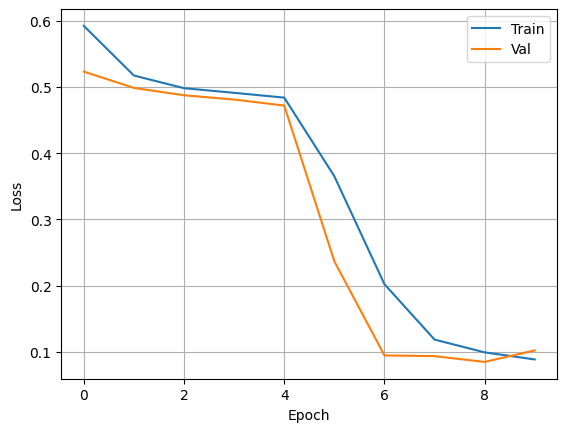

test30_0001


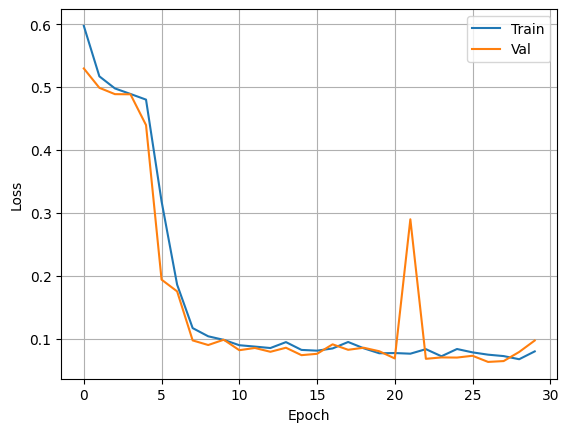

test50_0001


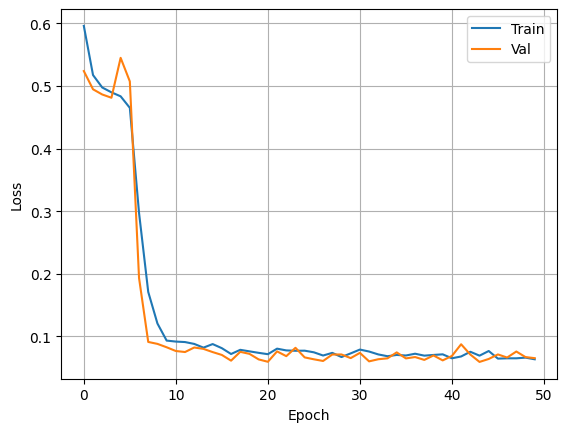

test30


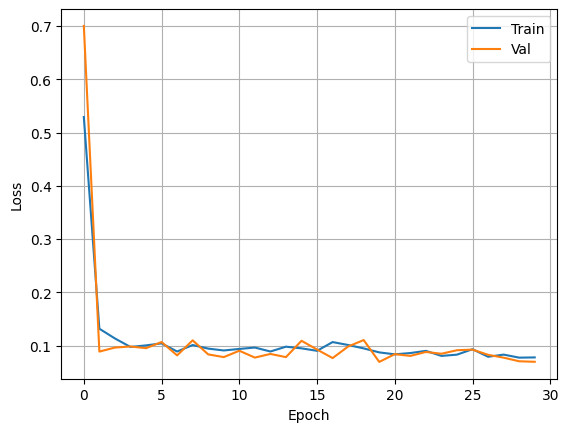

In [19]:
for file in files:
    if file.startswith("."):
        continue  # skip hidden files
    print(file)
    path_file = os.path.join(path, file)
    metrics_path = os.path.join(path_file, 'metrics_from_tb.csv')# load metrics
    
    df = pd.read_csv(metrics_path)

    plt.figure()
    
    plt.plot(df.index, df["Loss/Train"], label="Train")
    plt.plot(df.index, df["Loss/Val"], label="Val")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

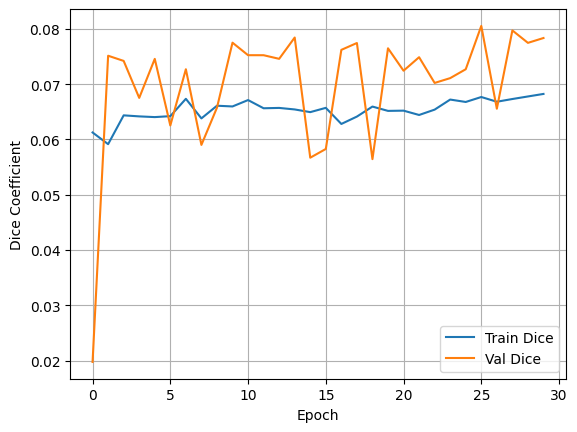

In [22]:
# plot dice
plt.figure()
plt.plot(df.index, df["Metrics/Train/dice"], label="Train Dice")
plt.plot(df.index, df["Metrics/Val/dice"], label="Val Dice")
plt.xlabel("Epoch")
plt.ylabel("Dice Coefficient")
plt.legend()
plt.grid(True)
plt.show()